<a href="https://colab.research.google.com/github/ljin8/64060_-ljin8_Assignment-4/blob/main/AML_Assignment_4_Lei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4 - Text and Sequence Data using IMDB dataset**

# **Lei Jin**

In [ ]:
!pip install tensorflow==2.12 #installing the 2.12 version because google colab uses this version

**Loading the important libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True

**Importing TensorFlow and Keras:**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from google.colab import files
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Layer, Embedding, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import re, os
import numpy as np
import matplotlib.pyplot as plt

# **LSTM with Randomly Initialized Embedding Layer**
Objective: Evaluate performance using a learned embedding under limited training samples (100 / 1,000 / 10,000)

# **Model A11 – LSTM + Random Embedding**

Training Sample Size: 100

Embedding: Trainable, Random Init

In [ ]:
# Configuration
vocab_size = 10000       # Only keep the top 10,000 most frequent words
maxlen = 150             # Truncate/pad reviews to 150 words
embedding_dim = 100      # Dimension of embedding vectors
lstm_units = 64          # Number of units in the LSTM layer

train_sample_size = 100

# Load and preprocess IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Create training and validation subsets
x_train_small = x_train[:train_sample_size]
y_train_small = y_train[:train_sample_size]

x_val = x_test[:10000]
y_val = y_test[:10000]

# Build the model
model_A11 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(lstm_units),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_A11.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model_A11.summary()

# Define callbacks
callbacks_A11 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_A1.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train the model
history_A11 = model_A11.fit(
    x_train_small, y_train_small,
    epochs=20,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=callbacks_A11
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,042,305
Trainable params: 1,042,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.5200
Epoch 1: val_accuracy improved from -inf to 0.50250, saving model to best_model_A1.h5
7/7 [==============================] - 25s 4s/step - loss: 0.6912 - accuracy: 0.5200 - val_loss: 0.6930 - val_accuracy: 0.5025 - l

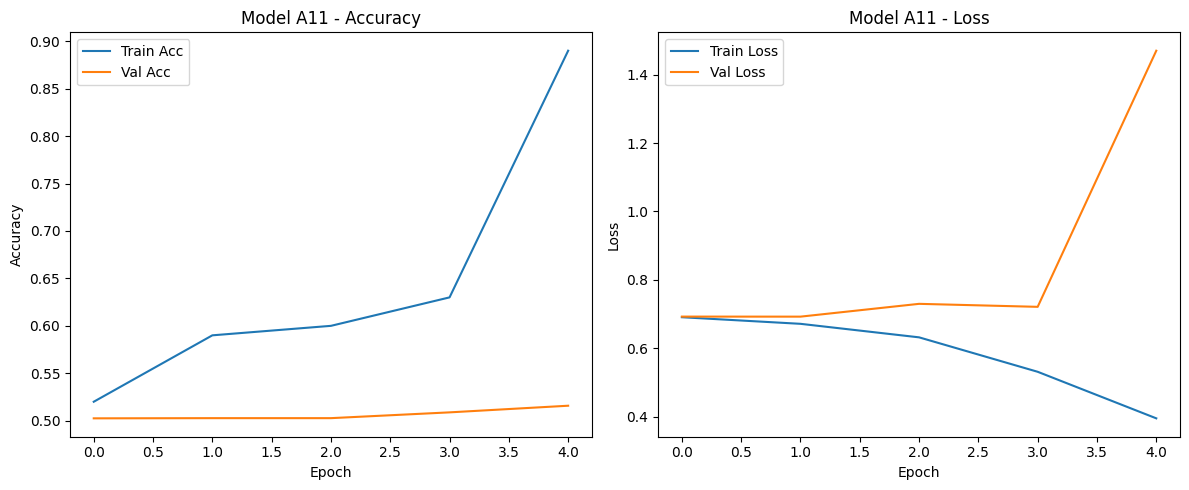

In [ ]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_A11.history['accuracy'], label='Train Acc')
plt.plot(history_A11.history['val_accuracy'], label='Val Acc')
plt.title('Model A11 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_A11.history['loss'], label='Train Loss')
plt.plot(history_A11.history['val_loss'], label='Val Loss')
plt.title('Model A11 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate
test_loss, test_acc = model_A11.evaluate(x_test, y_test)

best_val_acc = max(history_A11.history['val_accuracy'])

print(f"\n✅ Final Evaluation for A11 (Samples: {train_sample_size})")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Test Loss:         {test_loss:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f}")

782/782 [==============================] - 21s 27ms/step - loss: 0.6931 - accuracy: 0.5000

✅ Final Evaluation for A11 (Samples: 10000)
Test Accuracy:     0.5000
Test Loss:         0.6931
Best Val Accuracy: 0.5158


# **Model A12 – LSTM + Random Embedding**

Training Sample Size: 1000

Embedding: Trainable, Random Init

In [ ]:
# Configuration
vocab_size = 10000
maxlen = 150
embedding_dim = 100
lstm_units = 64

train_sample_size = 1000

# Load and preprocess IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Create training and validation subsets
x_train_small = x_train[:train_sample_size]
y_train_small = y_train[:train_sample_size]

x_val = x_test[:10000]
y_val = y_test[:10000]

# Build the model
model_A12 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(lstm_units),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_A12.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model_A12.summary()

# Define callbacks
callbacks_A12 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_A1.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train the model
history_A12 = model_A12.fit(
    x_train_small, y_train_small,
    epochs=20,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=callbacks_A12
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,042,305
Trainable params: 1,042,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.5770
Epoch 1: val_accuracy improved from -inf to 0.69450, saving model to best_model_A1.h5
63/63 [==============================] - 22s 304ms/step - loss: 0.6815 - accuracy: 0.5770 - val_loss: 0.6338 - val_accuracy: 0.6

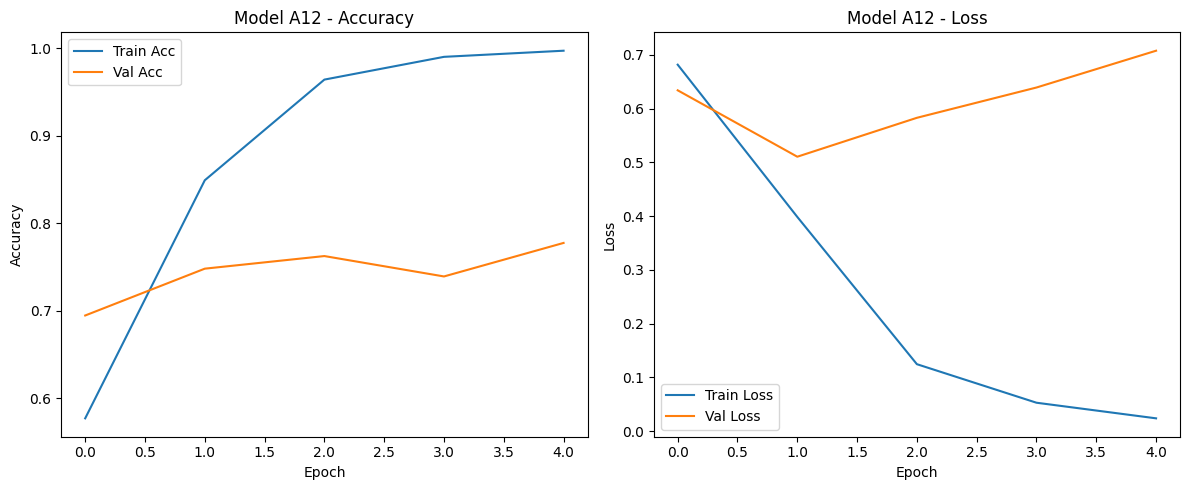

In [ ]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_A12.history['accuracy'], label='Train Acc')
plt.plot(history_A12.history['val_accuracy'], label='Val Acc')
plt.title('Model A12 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_A12.history['loss'], label='Train Loss')
plt.plot(history_A12.history['val_loss'], label='Val Loss')
plt.title('Model A12 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model_A12.evaluate(x_test, y_test)

best_val_acc = max(history_A12.history['val_accuracy'])

print(f"\n✅ Final Evaluation for A12 (Samples: {train_sample_size})")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Test Loss:         {test_loss:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f}")

782/782 [==============================] - 23s 29ms/step - loss: 0.5137 - accuracy: 0.7467

✅ Final Evaluation for A12 (Samples: 10000)
Test Accuracy:     0.7467
Test Loss:         0.5137
Best Val Accuracy: 0.7774


# **Model A13 – LSTM + Random Embedding**

Training Sample Size: 10000

Embedding: Trainable, Random Init

In [ ]:
# Configuration
vocab_size = 10000
maxlen = 150
embedding_dim = 100
lstm_units = 64

train_sample_size = 10000

# Load and preprocess IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Create training and validation subsets
x_train_small = x_train[:train_sample_size]
y_train_small = y_train[:train_sample_size]

x_val = x_test[:10000]
y_val = y_test[:10000]

# Build the model
model_A13 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(lstm_units),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_A13.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model_A13.summary()

# Define callbacks
callbacks_A13 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_A1.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train the model
history_A13 = model_A13.fit(
    x_train_small, y_train_small,
    epochs=20,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=callbacks_A13
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_4 (LSTM)               (None, 64)                42240     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,042,305
Trainable params: 1,042,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
625/625 [==============================] - ETA: 0s - loss: 0.4649 - accuracy: 0.7749
Epoch 1: val_accuracy improved from -inf to 0.84400, saving model to best_model_A1.h5
625/625 [==============================] - 69s 106ms/step - loss: 0.4649 - accuracy: 0.7749 - val_loss: 0.3603 - val_accuracy:

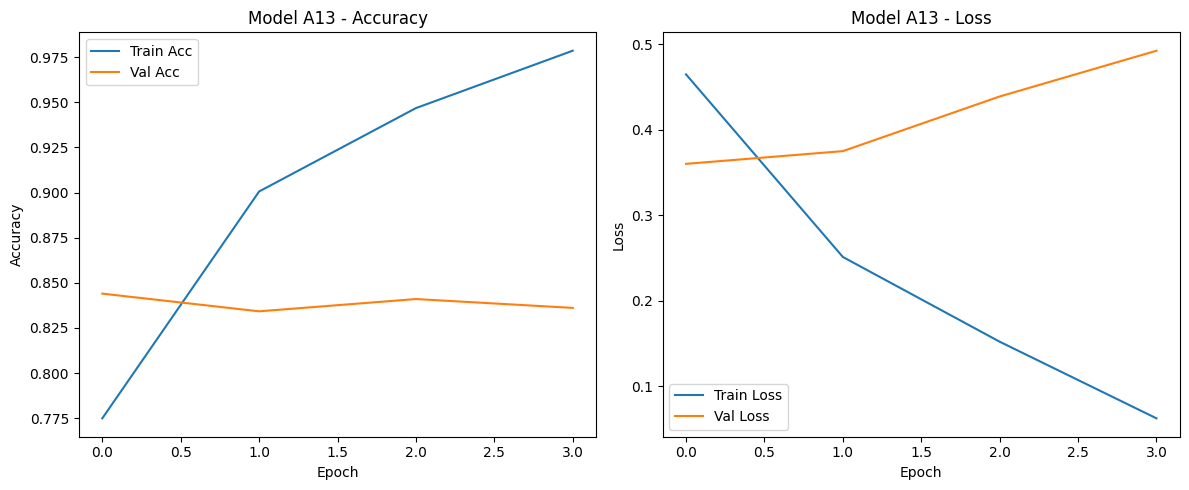

In [ ]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_A13.history['accuracy'], label='Train Acc')
plt.plot(history_A13.history['val_accuracy'], label='Val Acc')
plt.title('Model A13 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_A13.history['loss'], label='Train Loss')
plt.plot(history_A13.history['val_loss'], label='Val Loss')
plt.title('Model A13 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model_A13.evaluate(x_test, y_test)

best_val_acc = max(history_A13.history['val_accuracy'])

print(f"\n✅ Final Evaluation for A13 (Samples: {train_sample_size})")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Test Loss:         {test_loss:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f}")

782/782 [==============================] - 21s 27ms/step - loss: 0.3532 - accuracy: 0.8484

✅ Final Evaluation for A13 (Samples: 10000)
Test Accuracy:     0.8484
Test Loss:         0.3532
Best Val Accuracy: 0.8440


# **Model A21 – LSTM + Pretrained GloVe Embedding**

Training Sample Size: 100

Embedding: Pretrained (Frozen)

In [ ]:
!curl -L -A "Mozilla/5.0" http://nlp.stanford.edu/data/glove.6B.zip -o glove.6B.zip
!unzip -q glove.6B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   308    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   346    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  822M  100  822M    0     0  4654k      0  0:03:00  0:03:00 --:--:-- 4697k


In [ ]:
import os
print("GloVe 100d Found:", os.path.exists("glove.6B.100d.txt"))

GloVe 100d Found: True


In [ ]:
# Configuration
vocab_size = 10000
maxlen = 150
embedding_dim = 100
train_sample_size = 100
glove_path = 'glove.6B.100d.txt'

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

x_train_small = x_train[:train_sample_size]
y_train_small = y_train[:train_sample_size]
x_val = x_test[:10000]
y_val = y_test[:10000]

# Load GloVe embeddings
print("Loading GloVe vectors...")
embedding_index = {}
with open(glove_path, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs
print(f"Loaded {len(embedding_index)} word vectors.")

# Prepare embedding matrix
word_index = imdb.get_word_index()
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the model with pretrained GloVe embeddings
model_A21 = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              weights=[embedding_matrix],
              trainable=False),  # Frozen
    LSTM(64),
    Dense(1, activation='sigmoid')
])

print("Model A21 Summary:")
model_A21.summary()

# Compile the model
model_A21.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Define callbacks
callbacks_A21 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_A21.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train the model
history_A21 = model_A21.fit(
    x_train_small, y_train_small,
    epochs=20,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=callbacks_A21
)

🔄 Loading GloVe vectors...
Loaded 400000 word vectors.
1641221/1641221 [==============================] - 0s 0us/step
Model A21 Summary:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_5 (LSTM)               (None, 64)                42240     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,042,305
Trainable params: 42,305
Non-trainable params: 1,000,000
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.6300
Epoch 1: val_accuracy improved from -inf to 0.50270, saving model to best_

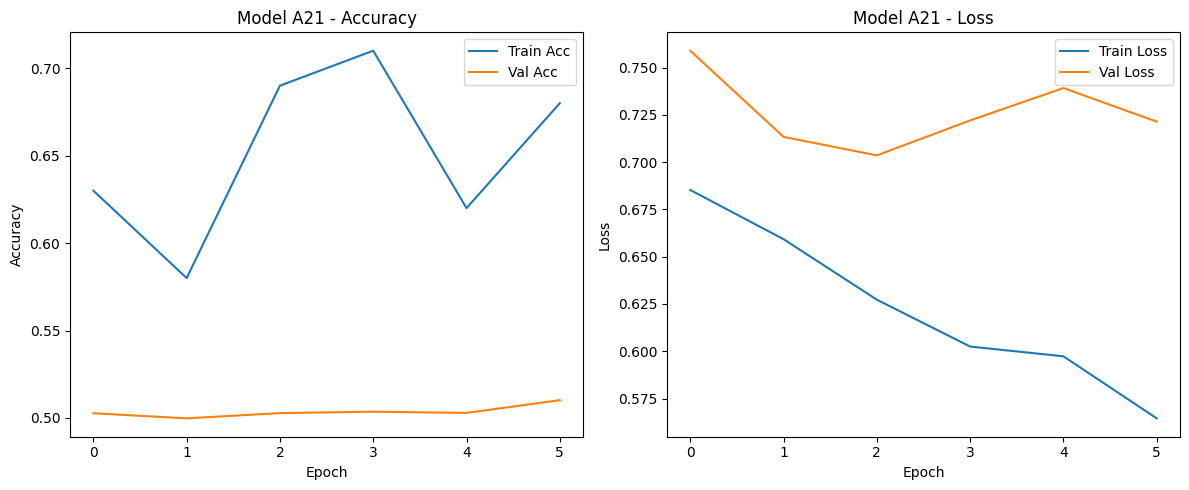

In [ ]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_A21.history['accuracy'], label='Train Acc')
plt.plot(history_A21.history['val_accuracy'], label='Val Acc')
plt.title('Model A21 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_A21.history['loss'], label='Train Loss')
plt.plot(history_A21.history['val_loss'], label='Val Loss')
plt.title('Model A21 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model_A21.evaluate(x_test, y_test)

best_val_acc = max(history_A21.history['val_accuracy'])

print(f"\n✅ Final Evaluation for A21 (Samples: {train_sample_size})")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Test Loss:         {test_loss:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f}")

782/782 [==============================] - 22s 28ms/step - loss: 0.7025 - accuracy: 0.5054

✅ Final Evaluation for A21 (Samples: 10000)
Test Accuracy:     0.5054
Test Loss:         0.7025
Best Val Accuracy: 0.5102


# **Model A22 – LSTM + Pretrained GloVe Embedding**

Training Sample Size: 1000

Embedding: Pretrained (Frozen)

In [ ]:
# Configuration
vocab_size = 10000
maxlen = 150
embedding_dim = 100
train_sample_size = 1000
glove_path = 'glove.6B.100d.txt'

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

x_train_small = x_train[:train_sample_size]
y_train_small = y_train[:train_sample_size]
x_val = x_test[:10000]
y_val = y_test[:10000]

# Load GloVe embeddings
print("Loading GloVe vectors...")
embedding_index = {}
with open(glove_path, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs
print(f"Loaded {len(embedding_index)} word vectors.")

# Prepare embedding matrix
word_index = imdb.get_word_index()
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the model with pretrained GloVe embeddings
model_A22 = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              weights=[embedding_matrix],
              trainable=False),  # Frozen
    LSTM(64),
    Dense(1, activation='sigmoid')
])

print("Model A22 Summary:")
model_A22.summary()

# Compile the model
model_A22.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Define callbacks
callbacks_A22 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_A21.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train the model
history_A22 = model_A22.fit(
    x_train_small, y_train_small,
    epochs=20,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=callbacks_A22
)

Loading GloVe vectors...
Loaded 400000 word vectors.
Model A22 Summary:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_6 (LSTM)               (None, 64)                42240     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,042,305
Trainable params: 42,305
Non-trainable params: 1,000,000
_________________________________________________________________
Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 0.6998 - accuracy: 0.4780
Epoch 1: val_accuracy improved from -inf to 0.52360, saving model to best_model_A21.h5
63/63 [==============================] - 26s 358ms

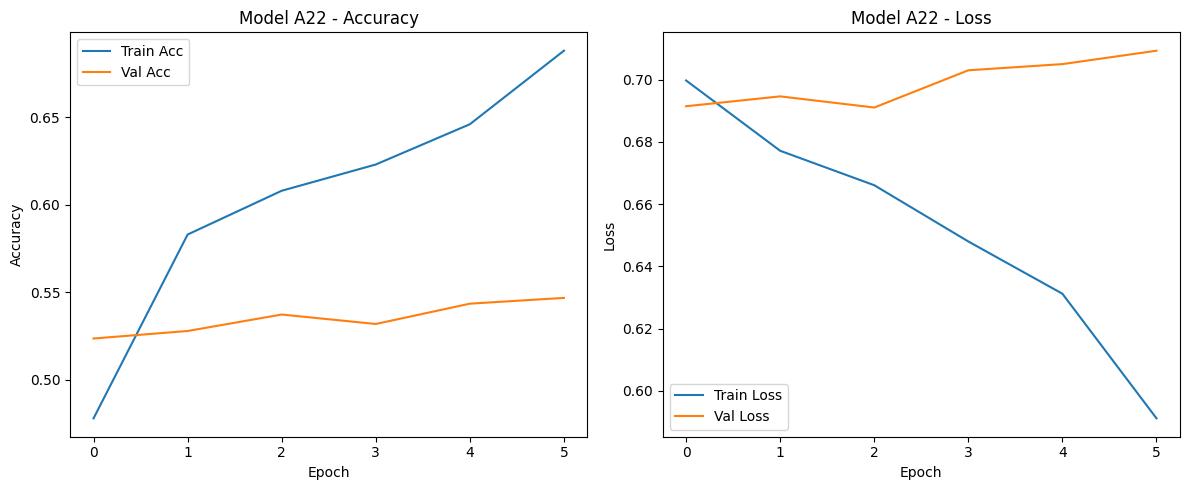

In [ ]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_A22.history['accuracy'], label='Train Acc')
plt.plot(history_A22.history['val_accuracy'], label='Val Acc')
plt.title('Model A22 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_A22.history['loss'], label='Train Loss')
plt.plot(history_A22.history['val_loss'], label='Val Loss')
plt.title('Model A22 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model_A22.evaluate(x_test, y_test)

best_val_acc = max(history_A22.history['val_accuracy'])

print(f"\n✅ Final Evaluation for A22 (Samples: {train_sample_size})")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Test Loss:         {test_loss:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f}")

782/782 [==============================] - 23s 29ms/step - loss: 0.5648 - accuracy: 0.7090

✅ Final Evaluation for A22 (Samples: 10000)
Test Accuracy:     0.7090
Test Loss:         0.5648
Best Val Accuracy: 0.5468


# **Model A23 – LSTM + Pretrained GloVe Embedding**

Training Sample Size: 10000

Embedding: Pretrained (Frozen)

In [ ]:
# Configuration
vocab_size = 10000
maxlen = 150
embedding_dim = 100
train_sample_size = 10000
glove_path = 'glove.6B.100d.txt'

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

x_train_small = x_train[:train_sample_size]
y_train_small = y_train[:train_sample_size]
x_val = x_test[:10000]
y_val = y_test[:10000]

# Load GloVe embeddings
print("Loading GloVe vectors...")
embedding_index = {}
with open(glove_path, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs
print(f"Loaded {len(embedding_index)} word vectors.")

# Prepare embedding matrix
word_index = imdb.get_word_index()
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the model with pretrained GloVe embeddings
model_A23 = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=maxlen,
              weights=[embedding_matrix],
              trainable=False),  # Frozen
    LSTM(64),
    Dense(1, activation='sigmoid')
])

print("Model A23 Summary:")
model_A23.summary()

# Compile the model
model_A23.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Define callbacks
callbacks_A23 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_A21.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train the model
history_A23 = model_A22.fit(
    x_train_small, y_train_small,
    epochs=20,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=callbacks_A23
)

Loading GloVe vectors...
Loaded 400000 word vectors.
Model A23 Summary:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_7 (LSTM)               (None, 64)                42240     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,042,305
Trainable params: 42,305
Non-trainable params: 1,000,000
_________________________________________________________________
Epoch 1/20
625/625 [==============================] - ETA: 0s - loss: 0.6773 - accuracy: 0.5673
Epoch 1: val_accuracy improved from -inf to 0.59330, saving model to best_model_A21.h5
625/625 [==============================] - 60s 9

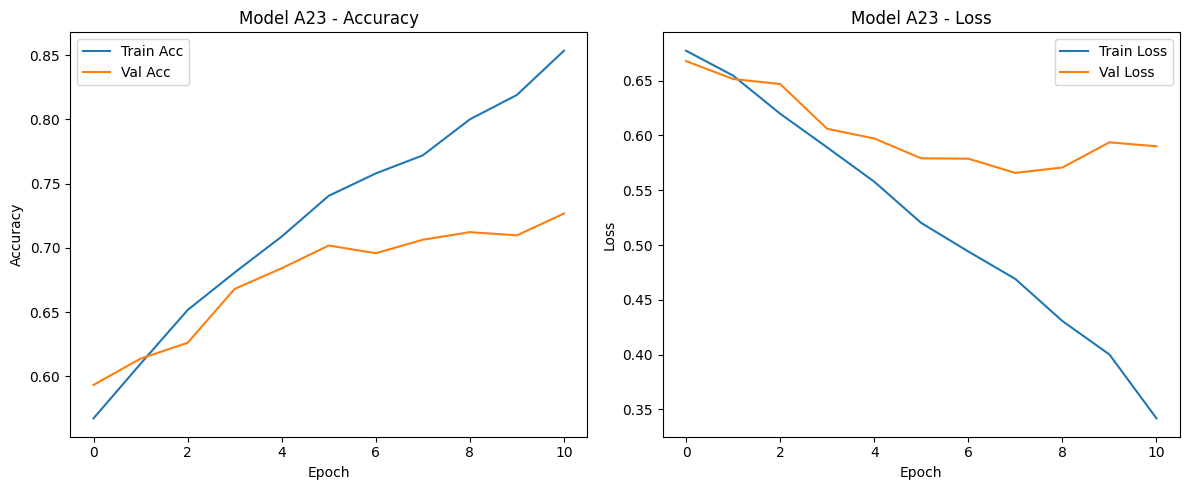

In [ ]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_A23.history['accuracy'], label='Train Acc')
plt.plot(history_A23.history['val_accuracy'], label='Val Acc')
plt.title('Model A23 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_A23.history['loss'], label='Train Loss')
plt.plot(history_A23.history['val_loss'], label='Val Loss')
plt.title('Model A23 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model_A23.evaluate(x_test, y_test)

best_val_acc = max(history_A23.history['val_accuracy'])

print(f"\n✅ Final Evaluation for A23 (Samples: {train_sample_size})")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Test Loss:         {test_loss:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f}")

782/782 [==============================] - 31s 37ms/step - loss: 0.6994 - accuracy: 0.4997

✅ Final Evaluation for A23 (Samples: 10000)
Test Accuracy:     0.4997
Test Loss:         0.6994
Best Val Accuracy: 0.7267


# **Model B11 – Transformer + Random Embedding**

Training Sample Size: 1000

Embedding: Random Initialized (Trainable)



In [ ]:
# Configuration
vocab_size = 10000
maxlen = 150
embedding_dim = 100
train_sample_size = 1000

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

x_train_small = x_train[:train_sample_size]
y_train_small = y_train[:train_sample_size]
x_val = x_test[:10000]
y_val = y_test[:10000]

# Positional Embedding Layer
class PositionalEmbedding(Layer):
    def __init__(self, vocab_size, embed_dim, maxlen):
        super().__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[-1], delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# Transformer Encoder Block
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

# Build Transformer Model
def build_transformer_model():
    inputs = Input(shape=(maxlen,))
    x = PositionalEmbedding(vocab_size, embedding_dim, maxlen)(inputs)
    x = TransformerBlock(embed_dim=embedding_dim, num_heads=2, ff_dim=128)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

model_B11 = build_transformer_model()
print("Model B1.1 Summary:")
model_B11.summary()

# Compile
model_B11.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
callbacks_B11 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_B11.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train
history_B11 = model_B11.fit(
    x_train_small, y_train_small,
    epochs=20,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=callbacks_B11
)

Model B1.1 Summary:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 positional_embedding (Posit  (None, 150, 100)         1015000   
 ionalEmbedding)                                                 
                                                                 
 transformer_block (Transfor  (None, 150, 100)         106928    
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                         

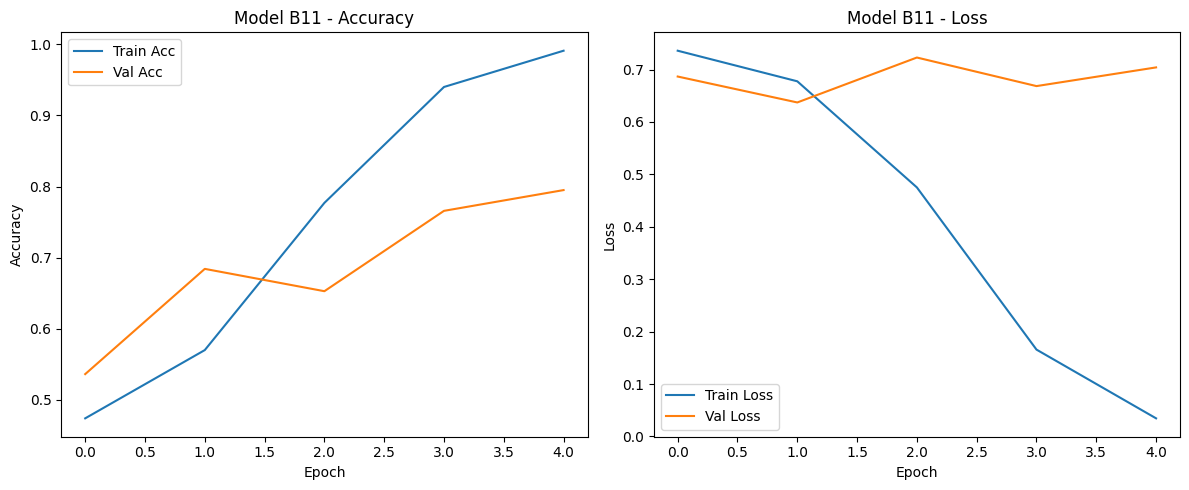

In [ ]:
# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_B11.history['accuracy'], label='Train Acc')
plt.plot(history_B11.history['val_accuracy'], label='Val Acc')
plt.title('Model B11 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_B11.history['loss'], label='Train Loss')
plt.plot(history_B11.history['val_loss'], label='Val Loss')
plt.title('Model B11 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model_B11.evaluate(x_test, y_test)

best_val_acc = max(history_B11.history['val_accuracy'])

print(f"\n✅ Final Evaluation for B11 (Samples: {train_sample_size})")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Test Loss:         {test_loss:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f}")

782/782 [==============================] - 73s 93ms/step - loss: 0.6379 - accuracy: 0.6836

✅ Final Evaluation for B11 (Samples: 10000)
Test Accuracy:     0.6836
Test Loss:         0.6379
Best Val Accuracy: 0.7950


# **Model B12 – Transformer + Random Embedding**

Training Sample Size: 10000

Embedding: Random Initialized (Trainable)


In [ ]:
# Configuration
vocab_size = 10000
maxlen = 150
embedding_dim = 100
train_sample_size = 10000

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

x_train_small = x_train[:train_sample_size]
y_train_small = y_train[:train_sample_size]
x_val = x_test[:10000]
y_val = y_test[:10000]

# Positional Embedding Layer
class PositionalEmbedding(Layer):
    def __init__(self, vocab_size, embed_dim, maxlen):
        super().__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[-1], delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# Transformer Encoder Block
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

# Build Transformer Model
def build_transformer_model():
    inputs = Input(shape=(maxlen,))
    x = PositionalEmbedding(vocab_size, embedding_dim, maxlen)(inputs)
    x = TransformerBlock(embed_dim=embedding_dim, num_heads=2, ff_dim=128)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

model_B12 = build_transformer_model()
print("Model B12 Summary:")
model_B12.summary()

# Compile
model_B12.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
callbacks_B12 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_B11.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train
history_B12 = model_B12.fit(
    x_train_small, y_train_small,
    epochs=20,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=callbacks_B12
)

Model B12 Summary:
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150)]             0         
                                                                 
 positional_embedding_1 (Pos  (None, 150, 100)         1015000   
 itionalEmbedding)                                               
                                                                 
 transformer_block_1 (Transf  (None, 150, 100)         106928    
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                        

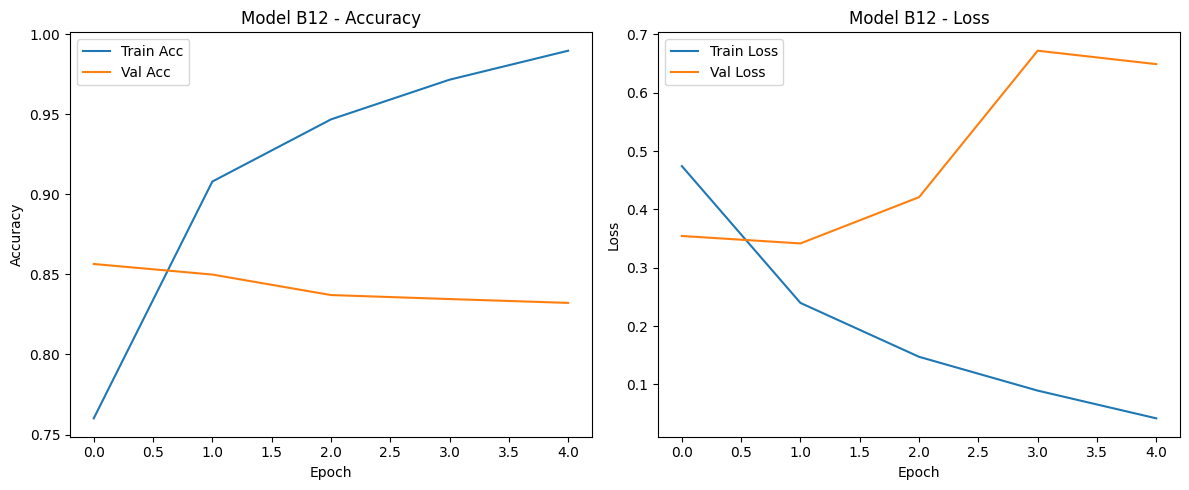

In [ ]:
# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_B12.history['accuracy'], label='Train Acc')
plt.plot(history_B12.history['val_accuracy'], label='Val Acc')
plt.title('Model B12 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_B12.history['loss'], label='Train Loss')
plt.plot(history_B12.history['val_loss'], label='Val Loss')
plt.title('Model B12 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model_B12.evaluate(x_test, y_test)

best_val_acc = max(history_B12.history['val_accuracy'])

print(f"\n✅ Final Evaluation for B12 (Samples: {train_sample_size})")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Test Loss:         {test_loss:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f}")

782/782 [==============================] - 73s 93ms/step - loss: 0.3484 - accuracy: 0.8512

✅ Final Evaluation for B12 (Samples: 10000)
Test Accuracy:     0.8512
Test Loss:         0.3484
Best Val Accuracy: 0.8565


# **Model Name: Model B21 – Transformer + Pretrained GloVe**

Training Sample Size: 1000

Embedding Type: Pretrained GloVe Word Embeddings (Frozen)

In [ ]:
# Configuration
vocab_size = 10000
maxlen = 150
embedding_dim = 100
train_sample_size = 1000
glove_path = 'glove.6B.100d.txt'

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
x_train_small = x_train[:train_sample_size]
y_train_small = y_train[:train_sample_size]
x_val = x_test[:10000]
y_val = y_test[:10000]

# Load GloVe vectors
embedding_index = {}
with open(glove_path, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

# Build embedding matrix
word_index = imdb.get_word_index()
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

# Positional Embedding with GloVe weights
class GloVePositionalEmbedding(Layer):
    def __init__(self, embedding_matrix, maxlen, trainable=False):
        super().__init__()
        vocab_size, embed_dim = embedding_matrix.shape
        self.token_emb = Embedding(input_dim=vocab_size,
                                   output_dim=embed_dim,
                                   weights=[embedding_matrix],
                                   trainable=trainable)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[-1], delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# Transformer Block
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

# Build Model B21
def build_transformer_glove_model():
    inputs = Input(shape=(maxlen,))
    x = GloVePositionalEmbedding(embedding_matrix, maxlen, trainable=False)(inputs)
    x = TransformerBlock(embed_dim=embedding_dim, num_heads=2, ff_dim=128)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs)

model_B21 = build_transformer_glove_model()
print("\n Model B21 Summary:")
model_B21.summary()

# Compile
model_B21.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
callbacks_B21 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_weights_B21.h5', monitor='val_accuracy', save_best_only=True, verbose=1, save_weights_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train
history_B21 = model_B21.fit(
    x_train_small, y_train_small,
    epochs=20,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=callbacks_B21
)


 Model B21 Summary:
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150)]             0         
                                                                 
 glo_ve_positional_embedding  (None, 150, 100)         1015000   
 _2 (GloVePositionalEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block_4 (Transf  (None, 150, 100)         106928    
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_4   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_18 (Dropout)        (None, 10

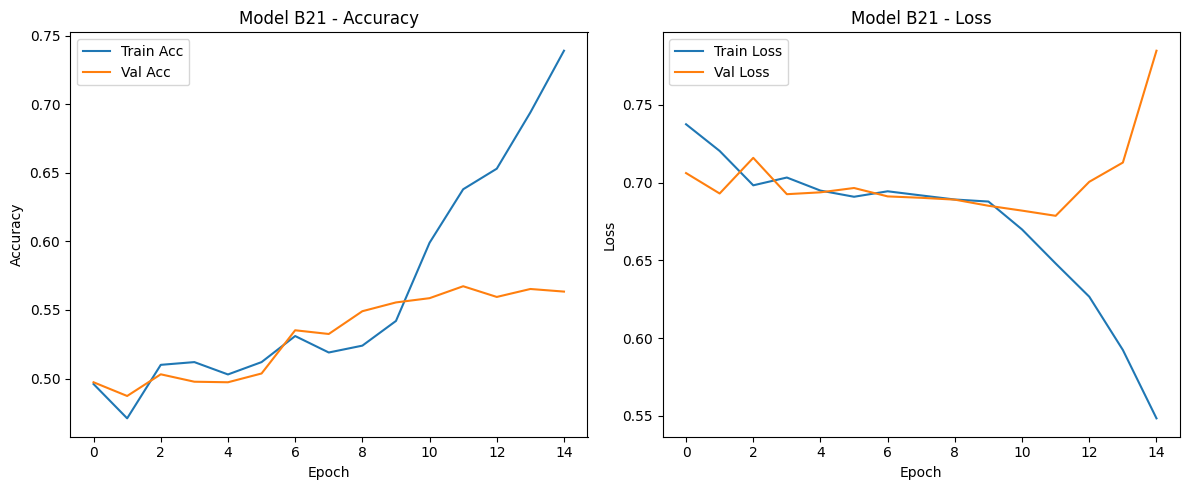

In [ ]:
# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_B21.history['accuracy'], label='Train Acc')
plt.plot(history_B21.history['val_accuracy'], label='Val Acc')
plt.title('Model B21 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_B21.history['loss'], label='Train Loss')
plt.plot(history_B21.history['val_loss'], label='Val Loss')
plt.title('Model B21 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model_B21.evaluate(x_test, y_test)

best_val_acc = max(history_B21.history['val_accuracy'])

print(f"\n✅ Final Evaluation for B21 (Samples: {train_sample_size})")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Test Loss:         {test_loss:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f}")

782/782 [==============================] - 58s 74ms/step - loss: 0.6774 - accuracy: 0.5692

✅ Final Evaluation for B21 (Samples: 10000)
Test Accuracy:     0.5692
Test Loss:         0.6774
Best Val Accuracy: 0.5673


# **Model Name: Model B22 – Transformer + Pretrained GloVe**

Training Sample Size: 10000

Embedding Type: Pretrained GloVe Word Embeddings (Frozen)

In [ ]:
# Configuration
vocab_size = 10000
maxlen = 150
embedding_dim = 100
train_sample_size = 10000
glove_path = 'glove.6B.100d.txt'

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
x_train_small = x_train[:train_sample_size]
y_train_small = y_train[:train_sample_size]
x_val = x_test[:10000]
y_val = y_test[:10000]

# Load GloVe vectors
embedding_index = {}
with open(glove_path, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

# Build embedding matrix
word_index = imdb.get_word_index()
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

# Positional Embedding with GloVe weights
class GloVePositionalEmbedding(Layer):
    def __init__(self, embedding_matrix, maxlen, trainable=False):
        super().__init__()
        vocab_size, embed_dim = embedding_matrix.shape
        self.token_emb = Embedding(input_dim=vocab_size,
                                   output_dim=embed_dim,
                                   weights=[embedding_matrix],
                                   trainable=trainable)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[-1], delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# Transformer Block
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

# Build Model B22
def build_transformer_glove_model():
    inputs = Input(shape=(maxlen,))
    x = GloVePositionalEmbedding(embedding_matrix, maxlen, trainable=False)(inputs)
    x = TransformerBlock(embed_dim=embedding_dim, num_heads=2, ff_dim=128)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs)

model_B22 = build_transformer_glove_model()
print("\n Model B22 Summary:")
model_B22.summary()

# Compile
model_B22.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
callbacks_B22 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_weights_B21.h5', monitor='val_accuracy', save_best_only=True, verbose=1, save_weights_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train
history_B22 = model_B22.fit(
    x_train_small, y_train_small,
    epochs=20,
    batch_size=16,
    validation_data=(x_val, y_val),
    callbacks=callbacks_B22
)


 Model B22 Summary:
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150)]             0         
                                                                 
 glo_ve_positional_embedding  (None, 150, 100)         1015000   
 _3 (GloVePositionalEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block_5 (Transf  (None, 150, 100)         106928    
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_5   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_22 (Dropout)        (None, 10

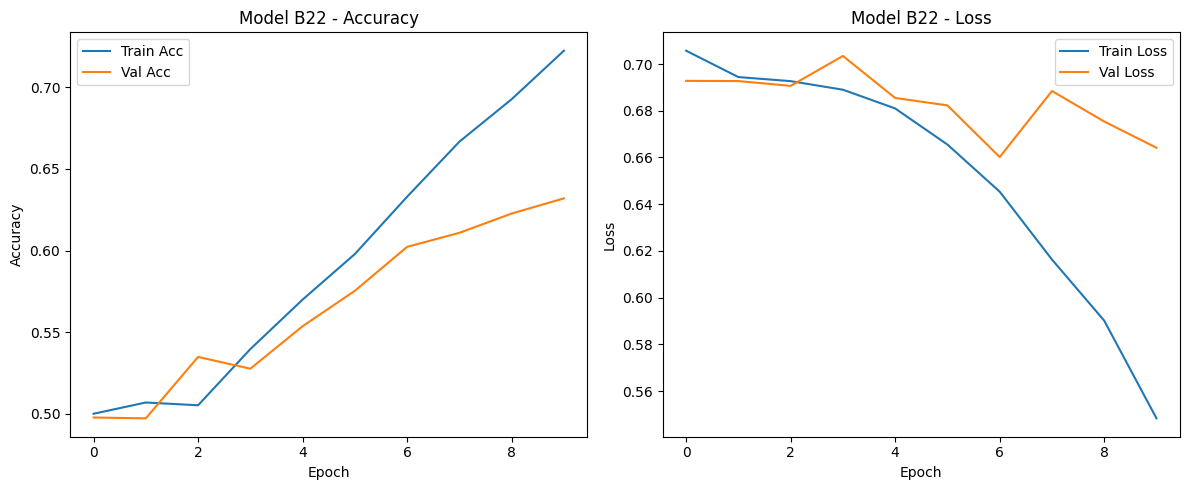

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_B22.history['accuracy'], label='Train Acc')
plt.plot(history_B22.history['val_accuracy'], label='Val Acc')
plt.title('Model B22 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_B22.history['loss'], label='Train Loss')
plt.plot(history_B22.history['val_loss'], label='Val Loss')
plt.title('Model B22 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate on the test set
test_loss, test_acc = model_B22.evaluate(x_test, y_test)

# Extract the best validation accuracy from training history
best_val_acc = max(history_B22.history['val_accuracy'])

# Print evaluation summary
print(f"\n✅ Final Evaluation for B2.2 (Samples: {train_sample_size})")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Test Loss:         {test_loss:.4f}")
print(f"Best Val Accuracy: {best_val_acc:.4f}")

782/782 [==============================] - 59s 75ms/step - loss: 0.6569 - accuracy: 0.6119

✅ Final Evaluation for B2.2 (Samples: 10000)
Test Accuracy:     0.6119
Test Loss:         0.6569
Best Val Accuracy: 0.6320


# **Conclusion**

In [1]:
import pandas as pd

model_summary_data = [
    ["A11", "LSTM", "Random", 100, "LSTM=64", "1", "no", 0.5158, 0.5000, 0.6931],
    ["A12", "LSTM", "Random", 1000, "LSTM=64", "1", "no", 0.7774, 0.7467, 0.5137],
    ["A13", "LSTM", "Random", 10000, "LSTM=64", "1", "no", 0.8440, 0.8484, 0.3532],
    ["A21", "LSTM", "GloVe (Frozen)", 100, "LSTM=64", "1", "no", 0.5102, 0.5054, 0.7025],
    ["A22", "LSTM", "GloVe (Frozen)", 1000, "LSTM=64", "1", "no", 0.5468, 0.7090, 0.5648],
    ["A23", "LSTM", "GloVe (Frozen)", 10000, "LSTM=64", "1", "no", 0.7267, 0.4997, 0.6994],
    ["B11", "Transformer", "Random", 1000, "FF=128", "1 enc", "0.3", 0.7950, 0.6836, 0.6379],
    ["B12", "Transformer", "Random", 10000, "FF=128", "1 enc", "0.3", 0.8565, 0.8512, 0.3484],
    ["B21", "Transformer", "GloVe (Frozen)", 1000, "FF=128", "1 enc", "0.3", 0.5673, 0.5692, 0.6774],
    ["B22", "Transformer", "GloVe (Frozen)", 10000, "FF=128", "1 enc", "0.3", 0.6320, 0.6119, 0.6569],
]

columns = [
    "Model ID", "Model Structure", "Embedding Type", "Training Samples",
    "Units / FF Dim", "Layers", "Dropout",
    "Best Val Accuracy", "Test Accuracy", "Test Loss"
]

df = pd.DataFrame(model_summary_data, columns=columns)

# Format accuracy/loss as percentages
df["Best Val Accuracy"] = (df["Best Val Accuracy"] * 100).map("{:.2f}%".format)
df["Test Accuracy"] = (df["Test Accuracy"] * 100).map("{:.2f}%".format)
df["Test Loss"] = df["Test Loss"].map("{:.4f}".format)

df

,Model ID,Model Structure,Embedding Type,Training Samples,Units / FF Dim,Layers,Dropout,Best Val Accuracy,Test Accuracy,Test Loss
0,A11,LSTM,Random,100,LSTM=64,1,no,51.58%,50.00%,0.6931
1,A12,LSTM,Random,1000,LSTM=64,1,no,77.74%,74.67%,0.5137
2,A13,LSTM,Random,10000,LSTM=64,1,no,84.40%,84.84%,0.3532
3,A21,LSTM,GloVe (Frozen),100,LSTM=64,1,no,51.02%,50.54%,0.7025
4,A22,LSTM,GloVe (Frozen),1000,LSTM=64,1,no,54.68%,70.90%,0.5648
5,A23,LSTM,GloVe (Frozen),10000,LSTM=64,1,no,72.67%,49.97%,0.6994
6,B11,Transformer,Random,1000,FF=128,1 enc,0.3,79.50%,68.36%,0.6379
7,B12,Transformer,Random,10000,FF=128,1 enc,0.3,85.65%,85.12%,0.3484
8,B21,Transformer,GloVe (Frozen),1000,FF=128,1 enc,0.3,56.73%,56.92%,0.6774
9,B22,Transformer,GloVe (Frozen),10000,FF=128,1 enc,0.3,63.20%,61.19%,0.6569


**Comparison of All Models Using a Grap**

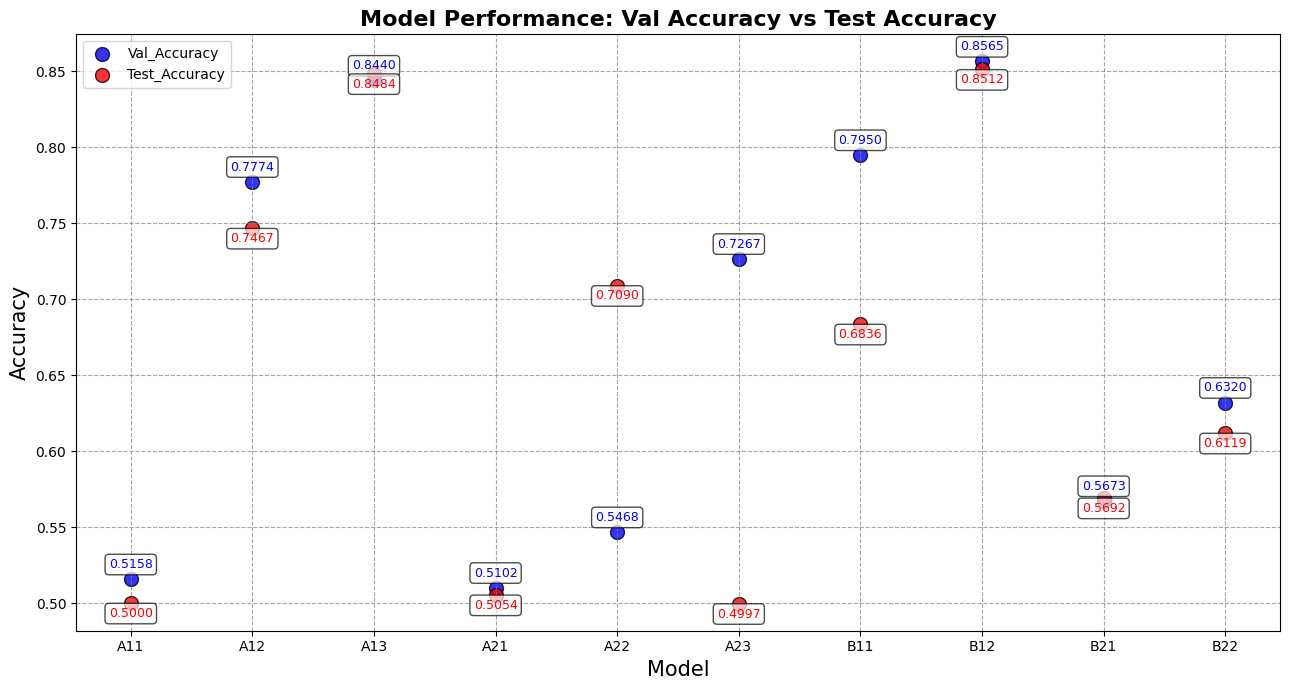

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define labels, Val_Accuracy, and Test_Accuracy values
Labels = [
    'A11', 'A12', 'A13', 'A21', 'A22', 'A23', 'B11', 'B12', 'B21', 'B22'
]
Val_Accuracy = [
    0.5158, 0.7774, 0.844, 0.5102, 0.5468, 0.7267, 0.795, 0.8565, 0.5673, 0.632
]
Test_Accuracy = [
    0.5, 0.7467, 0.8484, 0.5054, 0.709, 0.4997, 0.6836, 0.8512, 0.5692, 0.6119
]

# Creating a figure with a specified size
plt.figure(figsize=(13, 7))

# Scatter plot to visualize Val_Accuracy for different models
plt.scatter(Labels, Val_Accuracy, color='blue', s=100, edgecolor='black', alpha=0.8, label='Val_Accuracy')

# Scatter plot to visualize Test_Accuracy for different models
plt.scatter(Labels, Test_Accuracy, color='red', s=100, edgecolor='black', alpha=0.8, label='Test_Accuracy')

# Adding annotations for Val_Accuracy
for i, txt in enumerate(Val_Accuracy):
    plt.annotate(f"{txt:.4f}", (Labels[i], Val_Accuracy[i]), fontsize=9, ha='center',
                 xytext=(0, 8), textcoords='offset points', color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

# Adding annotations for Test_Accuracy
for i, txt in enumerate(Test_Accuracy):
    plt.annotate(f"{txt:.4f}", (Labels[i], Test_Accuracy[i]), fontsize=9, ha='center',
                 xytext=(0, -10), textcoords='offset points', color='red',
                 bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

# Adding title and labels
plt.title("Model Performance: Val Accuracy vs Test Accuracy", fontsize=16, fontweight='bold')
plt.xlabel("Model", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)

# Displaying grid with specific color and style
plt.grid(color='gray', linestyle='--', alpha=0.7)

# Adding legend
plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


**Test Accuracy vs Test Loss**

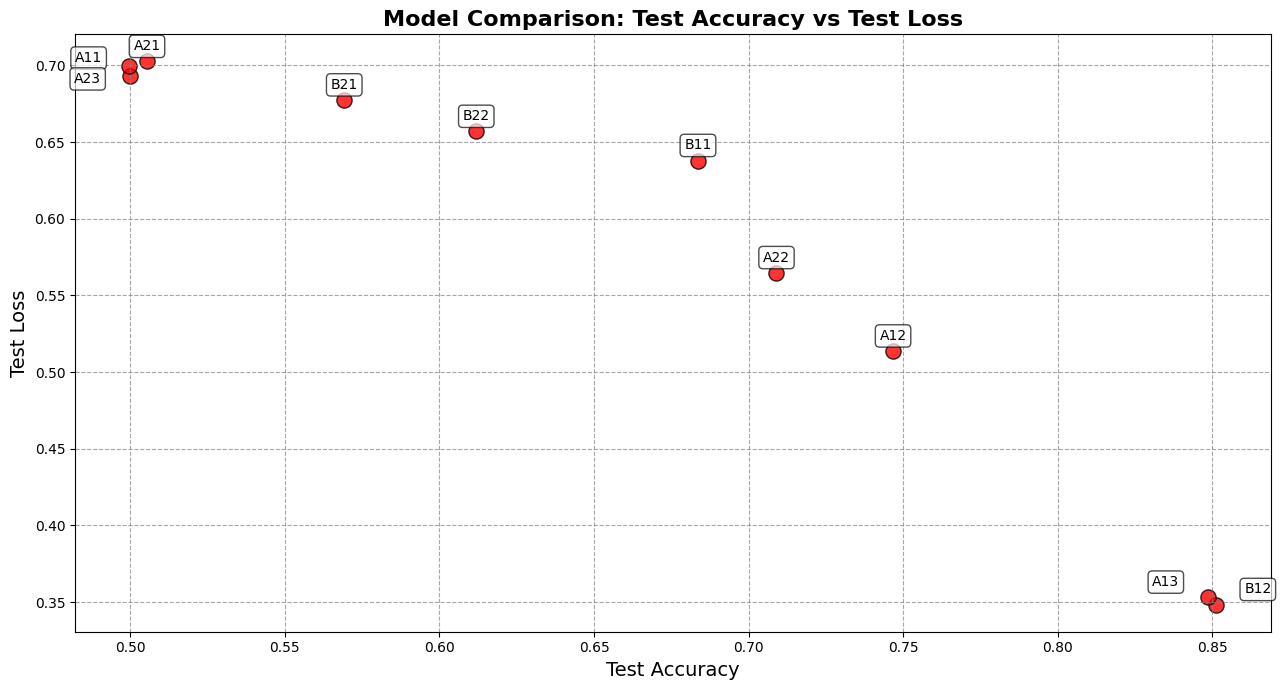

In [ ]:
# Replot with custom annotation positions for specific overlapping labels
plt.figure(figsize=(13, 7))
plt.scatter(df['Test Accuracy'], df['Test Loss'],
            color='red', s=120, edgecolor='black', alpha=0.8, marker='o')

# Custom annotation positions
for i in range(len(df)):
    model = df['Model'].iloc[i]
    x = df['Test Accuracy'].iloc[i]
    y = df['Test Loss'].iloc[i]

    # Custom offset positions for overlapping or close models
    if model == 'A11':
        offset = (-30, 10)
    elif model == 'A23':
        offset = (-30, -12)
    elif model == 'A13':
        offset = (-30, 8)
    elif model == 'B12':
        offset = (30, 8)
    else:
        offset = (0, 8)

    plt.annotate(model, (x, y),
                 fontsize=10, ha='center', xytext=offset, textcoords='offset points',
                 bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

# Chart formatting
plt.title("Model Comparison: Test Accuracy vs Test Loss", fontsize=16, fontweight='bold')
plt.xlabel("Test Accuracy", fontsize=14)
plt.ylabel("Test Loss", fontsize=14)
plt.grid(color='gray', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()